In [150]:
#Importing the requried libraries
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
#Load the data
tweets_data = pd.read_excel(r'/Users/anuragsangem/Downloads/Tweets_Data_Paper1_SMM_SPR23.xlsx')
    

In [196]:
tweets_data.head()

,S.No,Tweet,Timeline : Before/After the crash,Anger,Personal Experience,Confident / Happy,Fear/Sad,Junk/Spam – not related to the topic of my concern,Link,Month
0,1,Which #Crypto are you BULLISH ON this weekend ...,Before,NaN,NaN,1.0,NaN,NaN,https://twitter.com/cryptoworld202/status/1627...,Jul
1,2,I’m searching the next potential #100x Crypto ...,Before,NaN,NaN,1.0,NaN,NaN,https://twitter.com/cryptoworld202/status/1626...,Jul
2,3,Any #Crypto / #token worth buying today??,Before,NaN,NaN,NaN,1.0,NaN,https://twitter.com/cryptoworld202/status/1627...,NaN
3,4,"I have $10,000 to invest Which #cryptocurrency...",Before,NaN,NaN,1.0,NaN,NaN,https://twitter.com/TheDustyBC/status/16243853...,Jul
4,5,BabyDoge continues to trend on #Binance the wo...,Before,NaN,NaN,1.0,NaN,NaN,https://twitter.com/BabyDogeCoin/status/162548...,Jul


In [197]:
#Data preprocessing
tweets_data.rename(columns={"Junk/Spam – not related to the topic of my concern":"Junk/Spam"} , inplace=True)


In [198]:
#Filling the null values with 0
tweets_data=tweets_data.fillna(0)

In [199]:
tweets_data.columns

Index(['S.No', 'Tweet', 'Timeline : Before/After the crash', 'Anger',
       'Personal Experience', 'Confident / Happy', 'Fear/Sad', 'Junk/Spam',
       'Link', 'Month'],
      dtype='object')

In [200]:
columns=['Anger','Personal Experience', 'Confident / Happy', 'Fear/Sad','Junk/Spam']

In [139]:
#Converting the counts to numerical data
for col in columns:
    tweets_data[col]=tweets_data[col].astype(int)
    

In [140]:
counts_before_crash_df = pd.DataFrame()
counts_after_crash_df = pd.DataFrame()

In [141]:
#Creating two dataframes to store the before and after the FTX crash information
counts_before_crash_df=tweets_data[tweets_data['Timeline : Before/After the crash']== 'Before'][columns].sum()
counts_after_crash_df=tweets_data[tweets_data['Timeline : Before/After the crash']== 'After'][columns].sum()
    

In [142]:
counts_before_crash_df

Anger                   1
Personal Experience     8
Confident / Happy      19
Fear/Sad                7
Junk/Spam               2
dtype: int64

In [143]:
counts_after_crash_df

Anger                  20
Personal Experience    15
Confident / Happy       6
Fear/Sad               12
Junk/Spam               0
dtype: int64

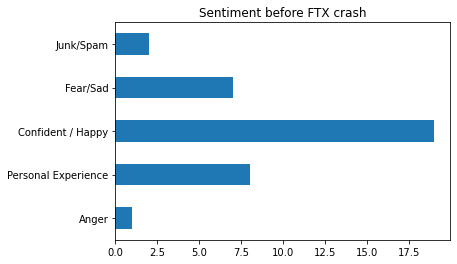

In [156]:
#plotting
ax=counts_before_crash_df.plot.barh(x='lab', y='val')
ax.set_title('Sentiment before FTX crash')
plt.show()

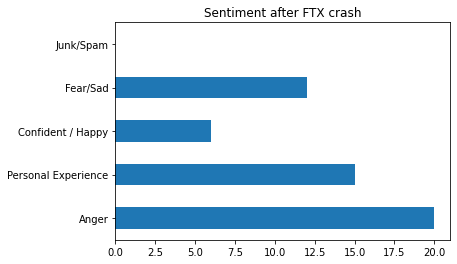

In [157]:
ax2=counts_after_crash_df.plot.barh(x='lab', y='val')
ax2.set_title('Sentiment after FTX crash')
plt.show()

In [235]:
tweets_data['Month']
df2 = pd.DataFrame(tweets_data.groupby(['Month','Confident / Happy'])['Confident / Happy'].count())


In [276]:
#trendline analysis of the data before the crash

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df2.sort_values('Month', key = lambda x : pd.Categorical(x, categories=months, ordered=True))

In [245]:
df2

,,Confident / Happy
Month,Confident / Happy,
Aug,1.0,4
Jul,1.0,8
Oct,1.0,2
Sep,1.0,5


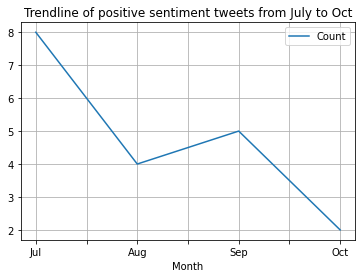

In [287]:
ax=df2.plot(x='Month' , grid =True)
ax.set_title("Trendline of positive sentiment tweets from July to Oct")
plt.show()